<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L14_Code_to_Verify_Backpropagation_Calculations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Forward Pass Results:
z1 = 2, a1 = 2
z2 = 7, a2 = 7
Cost = 2.0

Backpropagation Results:
dJ/da2 = 2
dJ/dz2 = 2.0
dJ/dw2 = 4.0
dJ/db2 = 2.0
dJ/da1 = 6.0
dJ/dz1 = 6.0
dJ/dw1 = 6.0
dJ/db1 = 6.0

Verification with epsilon = 0.001
dJ/dw1 (backprop): 6.0, (approximation): 6.004500000000412
dJ/db1 (backprop): 6.0, (approximation): 6.004500000000412
dJ/dw2 (backprop): 4.0, (approximation): 4.001999999999395
dJ/db2 (backprop): 2.0, (approximation): 2.0004999999989614


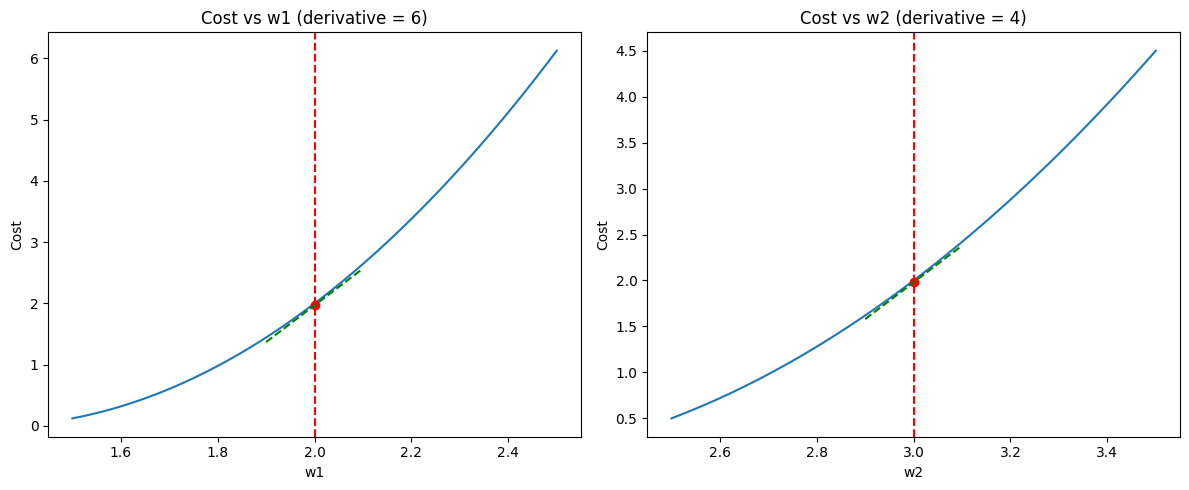

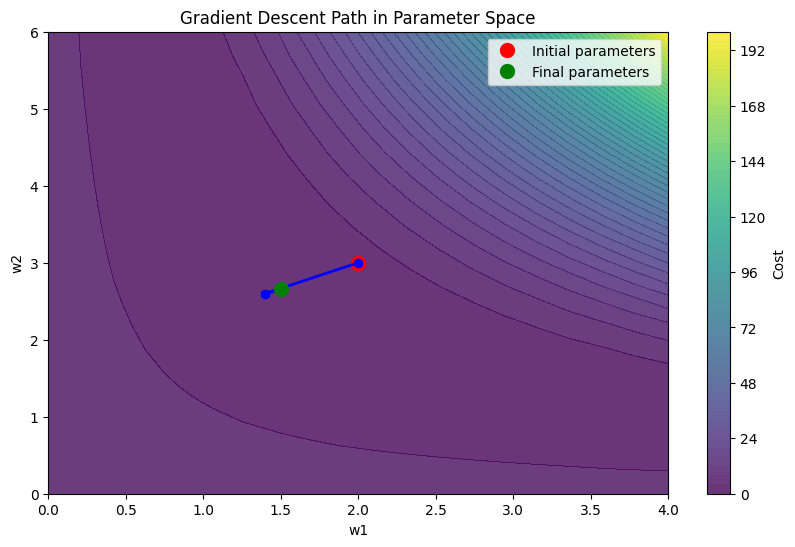


Gradient Descent Results:
Initial cost: 200.0
Final cost: 9.462324397626316e-11
Cost reduction: 199.99999999990538


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define ReLU activation function and its derivative
def relu(z):
    return np.maximum(0, z)

def relu_derivative(z):
    return 1.0 * (z > 0)

# Forward pass calculation
def forward_pass(x, w1, b1, w2, b2):
    # Hidden layer
    z1 = w1 * x + b1
    a1 = relu(z1)

    # Output layer
    z2 = w2 * a1 + b2
    a2 = relu(z2)

    return z1, a1, z2, a2

# Cost function
def compute_cost(a2, y):
    return 0.5 * (a2 - y)**2

# Parameters and inputs
x = 1
y = 5
w1 = 2
b1 = 0
w2 = 3
b2 = 1

# Compute forward pass
z1, a1, z2, a2 = forward_pass(x, w1, b1, w2, b2)
cost = compute_cost(a2, y)

print("Forward Pass Results:")
print(f"z1 = {z1}, a1 = {a1}")
print(f"z2 = {z2}, a2 = {a2}")
print(f"Cost = {cost}")

# Backpropagation (manual calculation)
# Output layer
dJ_da2 = a2 - y
da2_dz2 = relu_derivative(z2)
dJ_dz2 = dJ_da2 * da2_dz2

dz2_dw2 = a1
dJ_dw2 = dJ_dz2 * dz2_dw2

dz2_db2 = 1
dJ_db2 = dJ_dz2 * dz2_db2

# Hidden layer
dz2_da1 = w2
dJ_da1 = dJ_dz2 * dz2_da1

da1_dz1 = relu_derivative(z1)
dJ_dz1 = dJ_da1 * da1_dz1

dz1_dw1 = x
dJ_dw1 = dJ_dz1 * dz1_dw1

dz1_db1 = 1
dJ_db1 = dJ_dz1 * dz1_db1

print("\nBackpropagation Results:")
print(f"dJ/da2 = {dJ_da2}")
print(f"dJ/dz2 = {dJ_dz2}")
print(f"dJ/dw2 = {dJ_dw2}")
print(f"dJ/db2 = {dJ_db2}")
print(f"dJ/da1 = {dJ_da1}")
print(f"dJ/dz1 = {dJ_dz1}")
print(f"dJ/dw1 = {dJ_dw1}")
print(f"dJ/db1 = {dJ_db1}")

# Verify with small changes to parameters
epsilon = 0.001

# Check dJ/dw1
w1_plus = w1 + epsilon
z1_plus, a1_plus, z2_plus, a2_plus = forward_pass(x, w1_plus, b1, w2, b2)
cost_plus = compute_cost(a2_plus, y)
approx_dJ_dw1 = (cost_plus - cost) / epsilon

# Check dJ/db1
b1_plus = b1 + epsilon
z1_plus, a1_plus, z2_plus, a2_plus = forward_pass(x, w1, b1_plus, w2, b2)
cost_plus = compute_cost(a2_plus, y)
approx_dJ_db1 = (cost_plus - cost) / epsilon

# Check dJ/dw2
w2_plus = w2 + epsilon
z1_plus, a1_plus, z2_plus, a2_plus = forward_pass(x, w1, b1, w2_plus, b2)
cost_plus = compute_cost(a2_plus, y)
approx_dJ_dw2 = (cost_plus - cost) / epsilon

# Check dJ/db2
b2_plus = b2 + epsilon
z1_plus, a1_plus, z2_plus, a2_plus = forward_pass(x, w1, b1, w2, b2_plus)
cost_plus = compute_cost(a2_plus, y)
approx_dJ_db2 = (cost_plus - cost) / epsilon

print("\nVerification with epsilon =", epsilon)
print(f"dJ/dw1 (backprop): {dJ_dw1}, (approximation): {approx_dJ_dw1}")
print(f"dJ/db1 (backprop): {dJ_db1}, (approximation): {approx_dJ_db1}")
print(f"dJ/dw2 (backprop): {dJ_dw2}, (approximation): {approx_dJ_dw2}")
print(f"dJ/db2 (backprop): {dJ_db2}, (approximation): {approx_dJ_db2}")

# Visualize the effect of changing parameters
w1_range = np.linspace(1.5, 2.5, 100)
costs_w1 = []
for w in w1_range:
    _, _, _, a2 = forward_pass(x, w, b1, w2, b2)
    costs_w1.append(compute_cost(a2, y))

w2_range = np.linspace(2.5, 3.5, 100)
costs_w2 = []
for w in w2_range:
    _, _, _, a2 = forward_pass(x, w1, b1, w, b2)
    costs_w2.append(compute_cost(a2, y))

plt.figure(figsize=(12, 5))

# Plot cost vs w1
plt.subplot(1, 2, 1)
plt.plot(w1_range, costs_w1)
plt.axvline(x=w1, color='r', linestyle='--')
w1_idx = np.abs(w1_range - w1).argmin()
plt.plot(w1, costs_w1[w1_idx], 'ro')
# Add tangent line
x_tangent = np.array([w1-0.1, w1+0.1])
y_tangent = costs_w1[w1_idx] + dJ_dw1 * (x_tangent - w1)
plt.plot(x_tangent, y_tangent, 'g--')
plt.xlabel('w1')
plt.ylabel('Cost')
plt.title('Cost vs w1 (derivative = 6)')

# Plot cost vs w2
plt.subplot(1, 2, 2)
plt.plot(w2_range, costs_w2)
plt.axvline(x=w2, color='r', linestyle='--')
w2_idx = np.abs(w2_range - w2).argmin()
plt.plot(w2, costs_w2[w2_idx], 'ro')
# Add tangent line
x_tangent = np.array([w2-0.1, w2+0.1])
y_tangent = costs_w2[w2_idx] + dJ_dw2 * (x_tangent - w2)
plt.plot(x_tangent, y_tangent, 'g--')
plt.xlabel('w2')
plt.ylabel('Cost')
plt.title('Cost vs w2 (derivative = 4)')

plt.tight_layout()
plt.savefig('parameter_sensitivity.png')

# Gradient descent visualization
plt.figure(figsize=(10, 6))
w1_range = np.linspace(0, 4, 20)
w2_range = np.linspace(0, 6, 20)
W1, W2 = np.meshgrid(w1_range, w2_range)
Z = np.zeros_like(W1)

for i in range(len(w1_range)):
    for j in range(len(w2_range)):
        _, _, _, a2 = forward_pass(x, W1[j,i], b1, W2[j,i], b2)
        Z[j,i] = compute_cost(a2, y)

# Plot contour
plt.contourf(W1, W2, Z, 50, cmap='viridis', alpha=0.8)
plt.colorbar(label='Cost')

# Starting point
plt.plot(w1, w2, 'ro', markersize=10, label='Initial parameters')

# Perform gradient descent
current_w1, current_w2 = w1, w2
learning_rate = 0.1
w1_history, w2_history = [current_w1], [current_w2]
cost_history = [compute_cost(a2, y)]

for _ in range(5):
    # Compute gradients
    _, a1, _, a2 = forward_pass(x, current_w1, b1, current_w2, b2)
    cost = compute_cost(a2, y)

    # Backprop
    dJ_da2 = a2 - y
    dJ_dz2 = dJ_da2  # ReLU derivative = 1 for z2 > 0
    dJ_dw2 = dJ_dz2 * a1

    dJ_da1 = dJ_dz2 * current_w2
    dJ_dz1 = dJ_da1  # ReLU derivative = 1 for z1 > 0
    dJ_dw1 = dJ_dz1 * x

    # Update parameters
    current_w1 -= learning_rate * dJ_dw1
    current_w2 -= learning_rate * dJ_dw2

    # Save history
    w1_history.append(current_w1)
    w2_history.append(current_w2)

    # Compute new cost
    _, _, _, new_a2 = forward_pass(x, current_w1, b1, current_w2, b2)
    cost_history.append(compute_cost(new_a2, y))

# Plot gradient descent path
plt.plot(w1_history, w2_history, 'b-o', linewidth=2, markersize=6)
plt.plot(w1_history[-1], w2_history[-1], 'go', markersize=10, label='Final parameters')

plt.xlabel('w1')
plt.ylabel('w2')
plt.title('Gradient Descent Path in Parameter Space')
plt.legend()
plt.savefig('gradient_descent.png')
plt.show()

# Print the cost reduction
print("\nGradient Descent Results:")
print(f"Initial cost: {cost_history[0]}")
print(f"Final cost: {cost_history[-1]}")
print(f"Cost reduction: {cost_history[0] - cost_history[-1]}")